# Team Project

In [37]:
# libraries to import
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [38]:
crime = pd.read_csv("Neighbourhood_Crime_Rates.csv")
# keep relevant variables for analysis. since the other csv contains data from 2016, only focus on 2016 data
crime_cleaned = crime[['Neighbourhood', 'F2020_Population_Projection','Assault_2016', 'Assault_Rate2016', 'AutoTheft_2016', 'AutoTheft_Rate2016',
                      'BreakAndEnter_2016', 'BreakAndEnter_Rate2016', 'Robbery_2016', 'Robbery_Rate2016',
                      'TheftOver_2016', 'TheftOver_Rate2016', 'Homicide_2016', 'Homicide_Rate2016',
                      'Shootings_2016', 'Shootings_Rate2016', 'Shape__Area', 'Shape__Length']]

In [39]:
# "Rate" variables are rates per 100,000 people by neighbourhood using projected population
crime_cleaned.columns

Index(['Neighbourhood', 'F2020_Population_Projection', 'Assault_2016',
       'Assault_Rate2016', 'AutoTheft_2016', 'AutoTheft_Rate2016',
       'BreakAndEnter_2016', 'BreakAndEnter_Rate2016', 'Robbery_2016',
       'Robbery_Rate2016', 'TheftOver_2016', 'TheftOver_Rate2016',
       'Homicide_2016', 'Homicide_Rate2016', 'Shootings_2016',
       'Shootings_Rate2016', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [40]:
# take a glimpse at dataset
crime_cleaned.head(10)

,Neighbourhood,F2020_Population_Projection,Assault_2016,Assault_Rate2016,AutoTheft_2016,AutoTheft_Rate2016,BreakAndEnter_2016,BreakAndEnter_Rate2016,Robbery_2016,Robbery_Rate2016,TheftOver_2016,TheftOver_Rate2016,Homicide_2016,Homicide_Rate2016,Shootings_2016,Shootings_Rate2016,Shape__Area,Shape__Length
0,Yonge-St.Clair,14083,34,262.5482,7,54.05405,12,92.66409,6,46.33205,7,54.054050,0,0.000000,1,0.772201,1.161315e+06,5873.270507
1,York University Heights,30277,363,1269.3200,106,370.65530,98,342.68130,70,244.77240,38,132.876400,2,0.699350,4,1.398699,1.324666e+07,18504.777616
2,Lansing-Westgate,18146,67,400.6698,26,155.48380,41,245.18600,6,35.88087,5,29.900730,0,0.000000,1,0.598015,5.346186e+06,11112.109419
3,Yorkdale-Glen Park,17560,175,1149.1990,41,269.24090,66,433.41210,24,157.60440,26,170.738100,1,0.656685,3,1.970055,6.038326e+06,10079.426837
4,Stonegate-Queensway,27410,78,302.5249,14,54.29934,49,190.04770,13,50.42082,4,15.514100,0,0.000000,0,0.000000,7.946202e+06,11853.189803
5,Tam O'Shanter-Sullivan,29970,100,354.1829,21,74.37841,62,219.59340,24,85.00390,8,28.334630,0,0.000000,2,0.708366,5.422345e+06,10750.468290
6,The Beaches,23364,81,364.7170,7,31.51875,77,346.70630,19,85.55090,3,13.508040,0,0.000000,0,0.000000,3.595829e+06,11275.181284
7,Thistletown-Beaumond Heights,10948,46,430.8730,15,140.50210,23,215.43650,15,140.50210,1,9.366804,0,0.000000,2,1.873361,3.339481e+06,10828.444269
8,Thorncliffe Park,23518,88,403.4846,4,18.34021,24,110.04130,15,68.77579,11,50.435580,1,0.458505,1,0.458505,3.126554e+06,7502.709320
9,Danforth East York,18427,41,231.4031,12,67.72774,42,237.04710,4,22.57591,4,22.575910,0,0.000000,0,0.000000,2.188598e+06,7623.857803


In [41]:
# neighbourhood profiles seems to be in a wide format while neighbourhood crimes is long...
profiles = pd.read_csv("neighbourhood-profiles-2016-140-model.csv")
profiles

"""
KEEP 2016 POPULATION VARIABLE to mutate new rate variables

Interesting things we can analyze with crime rate from neighbourhood profiles:
does higher population => higher crime rate?
does neighbourhood with higher old population => higher crime rate?
- can also include old people living alone
neighbourhoods with high average income => higher crime rate?
neighbourhoods with more fancy homes => higher crime rate?
"""

'\nKEEP 2016 POPULATION VARIABLE to mutate new rate variables\n\nInteresting things we can analyze with crime rate from neighbourhood profiles:\ndoes higher population => higher crime rate?\ndoes neighbourhood with higher old population => higher crime rate?\n- can also include old people living alone\nneighbourhoods with high average income => higher crime rate?\nneighbourhoods with more fancy homes => higher crime rate?\n'

In [42]:
profiles[['Category','Topic', 'Data Source', 'Characteristic', 'Casa Loma']]

,Category,Topic,Data Source,Characteristic,Casa Loma
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,96
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,No Designation
2,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","10,968"
3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","10,487"
4,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.60%
...,...,...,...,...,...
2378,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Movers,"5,015"
2379,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Non-migrants,"3,330"
2380,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,"1,690"
2381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,325


In [43]:
# Unpivot the dataset
profiles_1 = pd.melt(profiles, id_vars=['Category','Topic','Data Source','Characteristic'])
profiles_1

,Category,Topic,Data Source,Characteristic,variable,value
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,_id,1
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,_id,2
2,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",_id,3
3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011",_id,4
4,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,_id,5
...,...,...,...,...,...,...
338381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Movers,Yorkdale-Glen Park,"4,290"
338382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Non-migrants,Yorkdale-Glen Park,"2,940"
338383,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,Yorkdale-Glen Park,"1,345"
338384,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,Yorkdale-Glen Park,135


In [44]:
profiles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338386 entries, 0 to 338385
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Category        338386 non-null  object
 1   Topic           338386 non-null  object
 2   Data Source     338386 non-null  object
 3   Characteristic  338386 non-null  object
 4   variable        338386 non-null  object
 5   value           330539 non-null  object
dtypes: object(6)
memory usage: 15.5+ MB


In [45]:
# remove variable '_id'
profiles_1 = profiles_1.drop(
    profiles_1[profiles_1["variable"] == '_id'].index
)

In [46]:
# remove variable 'City of Toronto'
profiles_1 = profiles_1.drop(
    profiles_1[profiles_1["variable"] == 'City of Toronto'].index
)

In [47]:
#profiles_1[(profiles_1['variable']=='City of Toronto') & (profiles_1['Data Source']=='City of Toronto')]
#profiles_1[profiles_1["Characteristic"].str.contains("TSNS2020", regex=False)]
#profiles_1[profiles_1['Characteristic'].str.contains("2020", regex=False)]
#profiles_1[profiles_1['variable']=='_id']
#profiles_1[(profiles_1['Data Source']=='City of Toronto')]
#profiles_1[profiles_1["Characteristic"].str.contains("TSNS2020", regex=False)]
profiles_1[profiles_1["Characteristic"]=="Neighbourhood Number"]

,Category,Topic,Data Source,Characteristic,variable,value
4766,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Agincourt North,129
7149,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Agincourt South-Malvern West,128
9532,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Alderwood,20
11915,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Annex,95
14298,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Banbury-Don Mills,42
...,...,...,...,...,...,...
326471,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Wychwood,94
328854,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Yonge-Eglinton,100
331237,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Yonge-St.Clair,97
333620,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,York University Heights,27


In [48]:
n_number = profiles_1[profiles_1["Characteristic"]=="Neighbourhood Number"]

In [49]:
n_number = n_number.set_index('variable')

In [50]:
profiles_1['neighbourhood_number'] = profiles_1.variable.map(dict(n_number['value']))

In [51]:
profiles_1

,Category,Topic,Data Source,Characteristic,variable,value,neighbourhood_number
4766,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,Agincourt North,129,129
4767,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,Agincourt North,No Designation,129
4768,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",Agincourt North,"29,113",129
4769,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011",Agincourt North,"30,279",129
4770,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,Agincourt North,-3.90%,129
...,...,...,...,...,...,...,...
338381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Movers,Yorkdale-Glen Park,"4,290",31
338382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Non-migrants,Yorkdale-Glen Park,"2,940",31
338383,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,Yorkdale-Glen Park,"1,345",31
338384,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,Yorkdale-Glen Park,135,31


In [52]:
# remove Characteristic 'Neighbourhood Number'
profiles_1 = profiles_1.drop(
    profiles_1[profiles_1["Characteristic"] == 'Neighbourhood Number'].index
)

In [53]:
profiles_1

,Category,Topic,Data Source,Characteristic,variable,value,neighbourhood_number
4767,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,Agincourt North,No Designation,129
4768,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",Agincourt North,"29,113",129
4769,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011",Agincourt North,"30,279",129
4770,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,Agincourt North,-3.90%,129
4771,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,Agincourt North,"9,371",129
...,...,...,...,...,...,...,...
338381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Movers,Yorkdale-Glen Park,"4,290",31
338382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Non-migrants,Yorkdale-Glen Park,"2,940",31
338383,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,Yorkdale-Glen Park,"1,345",31
338384,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,Yorkdale-Glen Park,135,31


In [54]:
# rename columns
profiles_1 = profiles_1.rename(columns={'Category': 'category', 'Topic': 'topic', 'Data Source': 'data_source', 'Characteristic':'characteristic', 'variable': 'neighbourhood_name'})

In [55]:
profiles_1

,category,topic,data_source,characteristic,neighbourhood_name,value,neighbourhood_number
4767,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,Agincourt North,No Designation,129
4768,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",Agincourt North,"29,113",129
4769,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011",Agincourt North,"30,279",129
4770,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,Agincourt North,-3.90%,129
4771,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,Agincourt North,"9,371",129
...,...,...,...,...,...,...,...
338381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Movers,Yorkdale-Glen Park,"4,290",31
338382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Non-migrants,Yorkdale-Glen Park,"2,940",31
338383,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,Yorkdale-Glen Park,"1,345",31
338384,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,Yorkdale-Glen Park,135,31


In [56]:
# get only datas from 2016
crimes_2016 = crime[['Neighbourhood','Hood_ID','Assault_2016','AutoTheft_2016','BreakAndEnter_2016','Robbery_2016','TheftOver_2016','Homicide_2016','Shootings_2016','Shape__Area','Shape__Length']]

# alter column name hood_id to neighbourhood_number
crimes_2016 = crimes_2016.rename(columns={'Hood_ID': 'neighbourhood_number'})

# index the crimes_2016 by neighbourhood_number
crimes_2016 = crimes_2016.set_index('neighbourhood_number')

# create a dataframe with population of 2016
population_2016 = profiles_1[profiles_1["characteristic"] == 'Population, 2016']

# adjust the type of column neighbourhood_number
population_2016 = population_2016.astype({'neighbourhood_number': int})

# rename column value to population
population_2016 = population_2016.rename(columns={'value': 'population'})

# adjust the type of column population
population_2016['population'] = population_2016['population'].str.replace(',', '')
population_2016 = population_2016.astype({'population': int})

# remove columns
population_2016 = population_2016[['neighbourhood_number','neighbourhood_name','population']]

# adjust the index
population_2016 = population_2016.set_index('neighbourhood_number')

# create new dataframe with datas from population_2016 and crimes 2016
population_assault = population_2016.merge(crimes_2016[['Assault_2016']], left_on='neighbourhood_number', right_on='neighbourhood_number')

# create new column with crimes/population (percent os crimes)
population_assault['assault_percent'] = (population_assault['Assault_2016']/population_assault['population'])*100



In [61]:
# top 10 neighbourhood in numebr of assaults
population_assault.sort_values(['Assault_2016'], ascending=False)[:10]

,neighbourhood_name,population,Assault_2016,assault_percent
neighbourhood_number,,,,
77,Waterfront Communities-The Island,65913,866,1.313853
76,Bay Street Corridor,25797,659,2.554561
75,Church-Yonge Corridor,31340,594,1.895341
73,Moss Park,20506,457,2.228616
136,West Hill,27392,422,1.540596
78,Kensington-Chinatown,17945,377,2.100864
137,Woburn,53485,365,0.682434
27,York University Heights,27593,363,1.315551
26,Downsview-Roding-CFB,35052,359,1.024193


In [62]:
# top 10 neighbourhood in percent of assault/population
population_assault.sort_values(['assault_percent'], ascending=False)[:10]

,neighbourhood_name,population,Assault_2016,assault_percent
neighbourhood_number,,,,
76,Bay Street Corridor,25797,659,2.554561
73,Moss Park,20506,457,2.228616
78,Kensington-Chinatown,17945,377,2.100864
79,University,7607,154,2.024451
75,Church-Yonge Corridor,31340,594,1.895341
136,West Hill,27392,422,1.540596
27,York University Heights,27593,363,1.315551
77,Waterfront Communities-The Island,65913,866,1.313853
24,Black Creek,21737,276,1.269724


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (140,) and arg 1 with shape (10,).

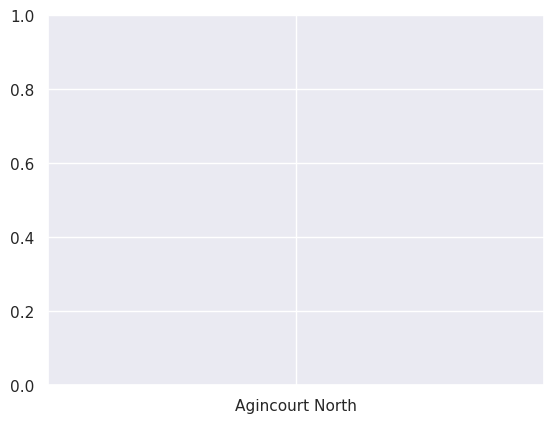

In [71]:
#population_assault[['neighbourhood_name']].iloc[:10]

population_assault = population_assault.sort_values([], ascending=False)

population_assault[['neighbourhood_name','assault_percent']].sort_values(['assault_percent'], ascending=False)[:10]

fig, ax = plt.subplots()

ax.bar(population_assault['neighbourhood_name'].iloc[:10], population_assault['assault_percent'].iloc[:10])
ax.set_ylabel('Assaults')
ax.set_title('Assaults by neighbourhood')

plt.show()